shovel


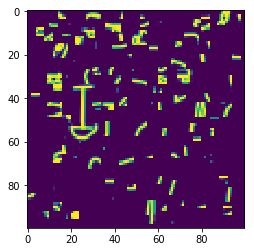

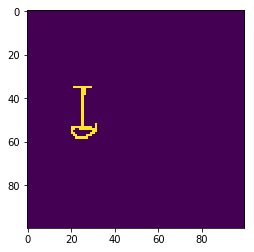

rifle


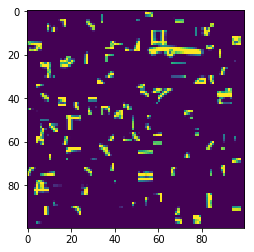

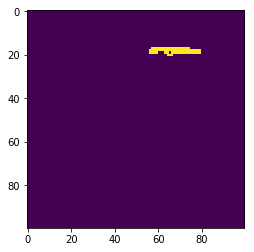

scorpion


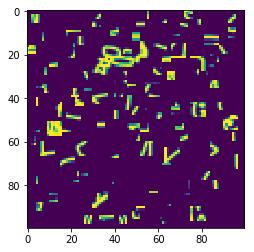

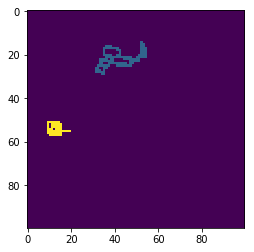

apple


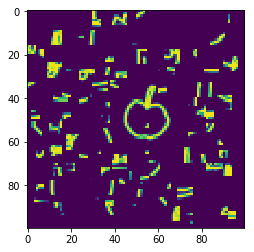

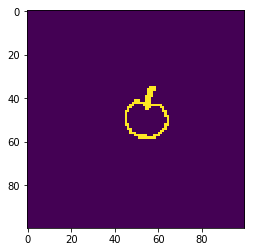

spoon


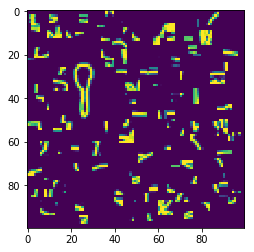

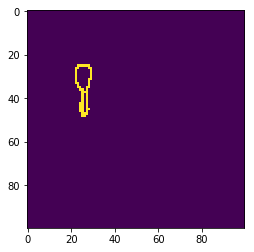

pineapple


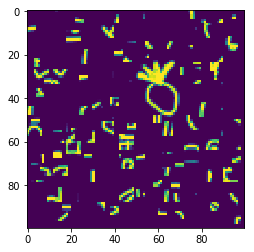

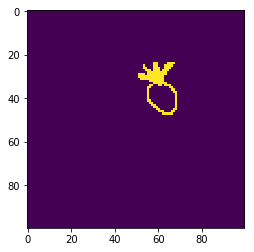

rifle


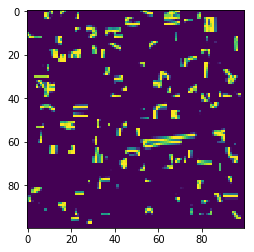

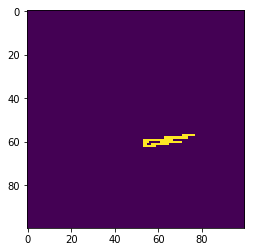

mouth


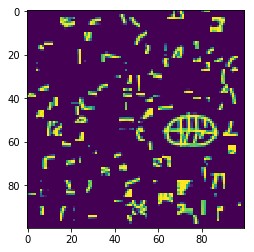

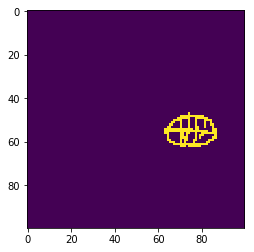

skateboard


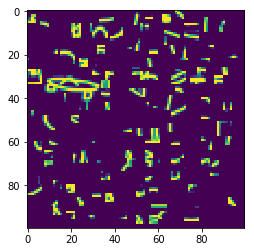

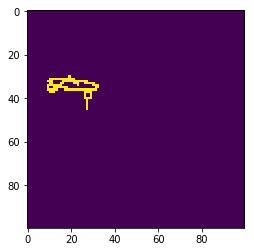

rollerskates


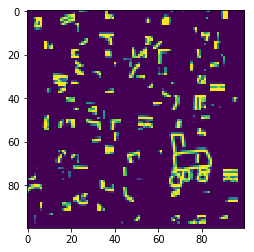

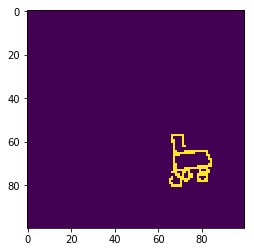

peanut


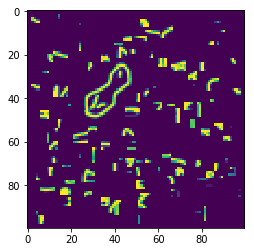

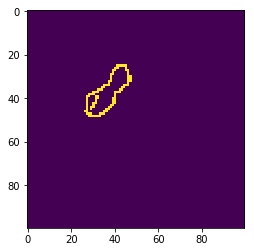

rabbit


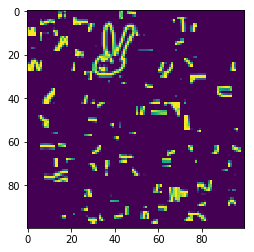

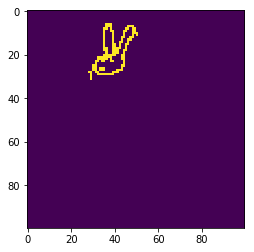

sink


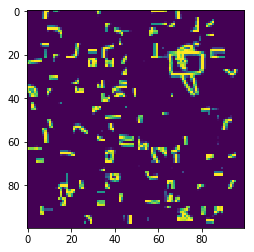

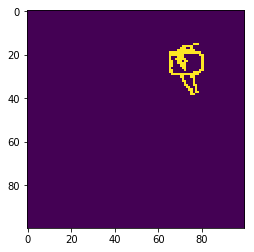

sailboat


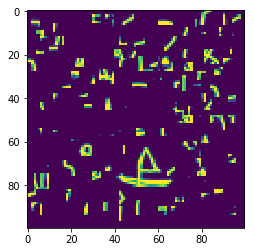

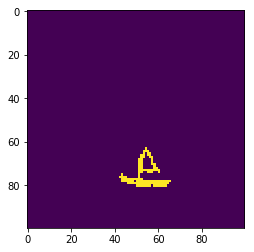

nose


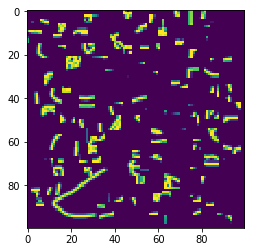

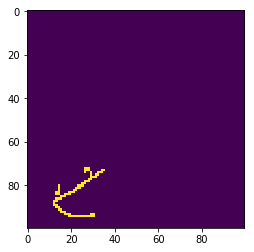

nose


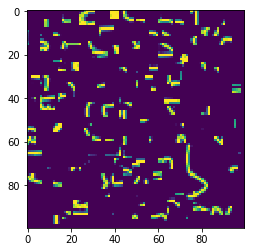

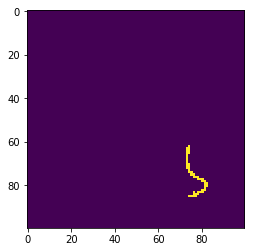

skull


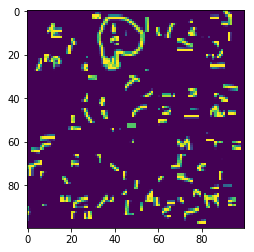

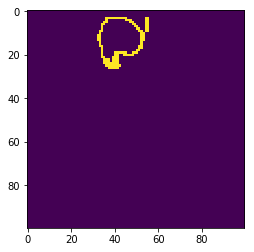

mouth


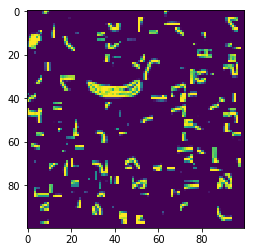

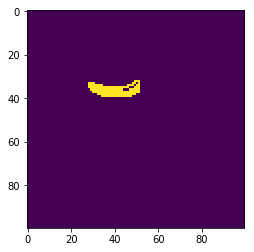

pool


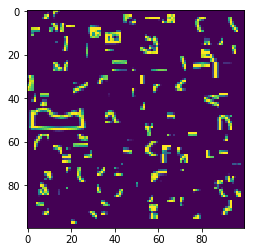

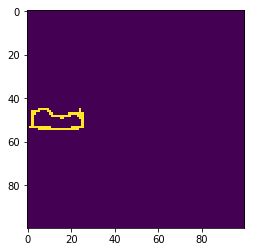

mouth


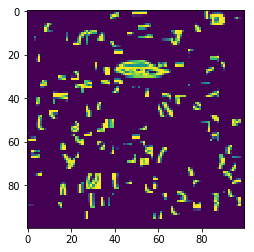

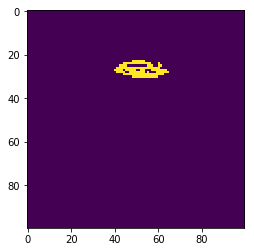

peanut


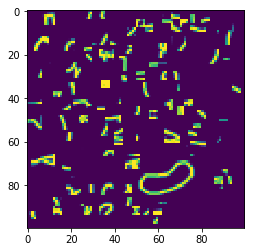

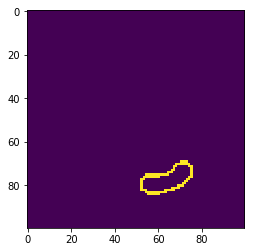

rifle


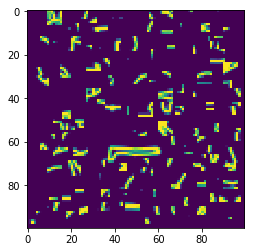

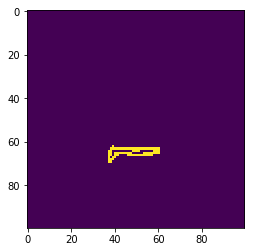

pear


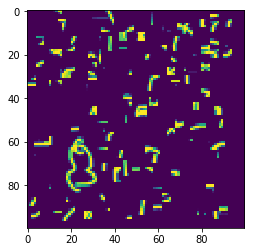

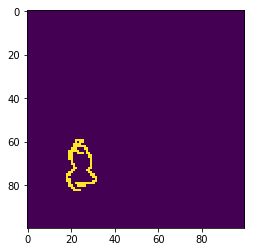

scorpion


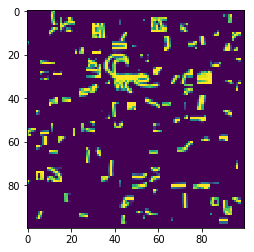

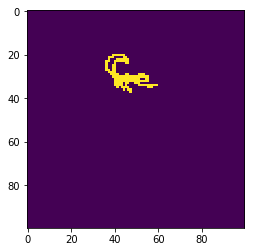

pillow


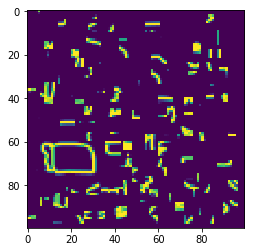

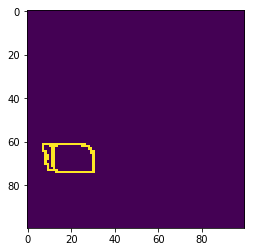

penguin


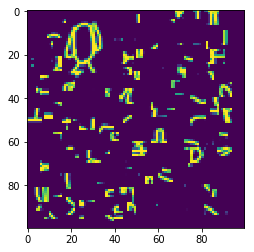

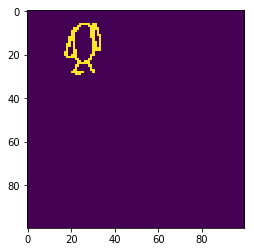

skull


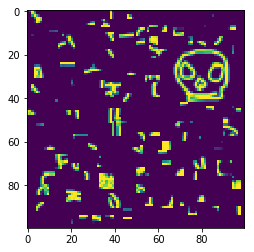

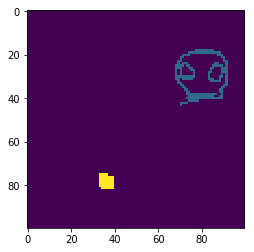

skateboard


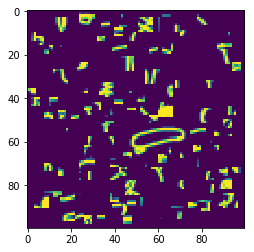

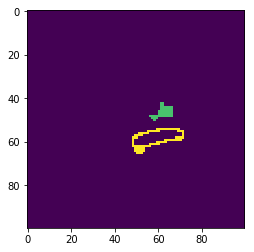

nail


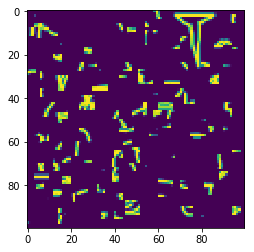

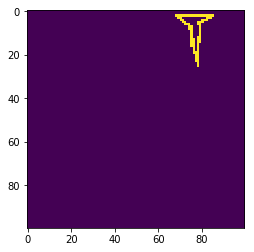

pencil


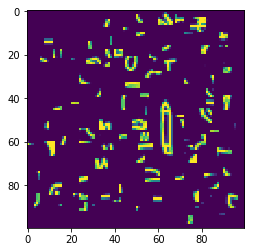

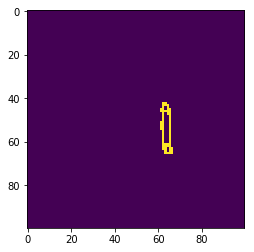

penguin


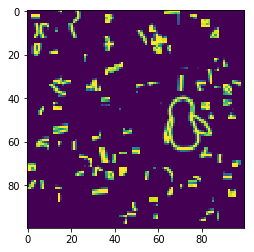

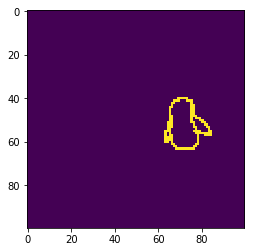

empty


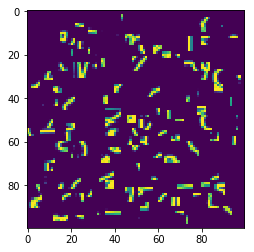

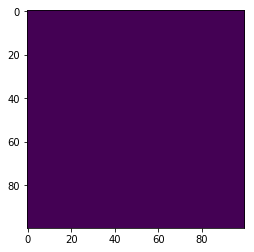

rollerskates


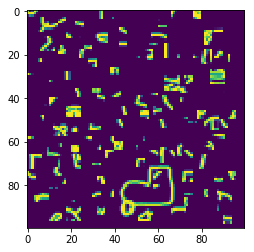

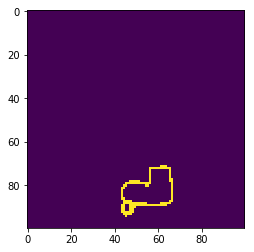

shovel


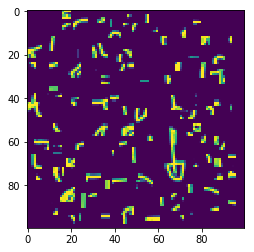

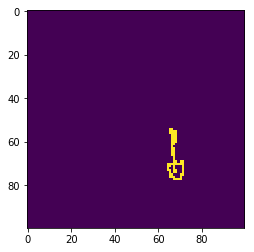

rifle


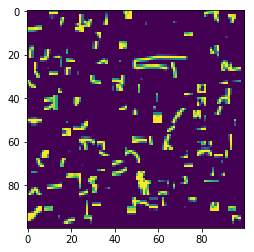

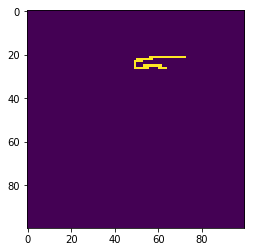

pool


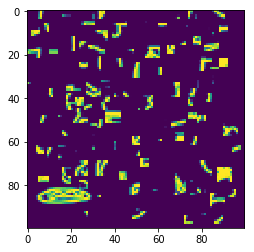

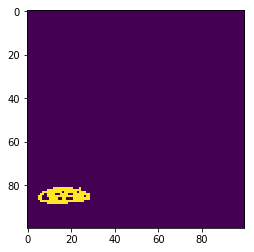

peanut


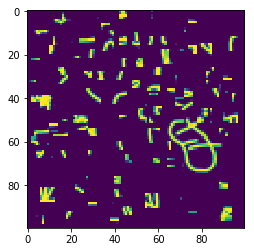

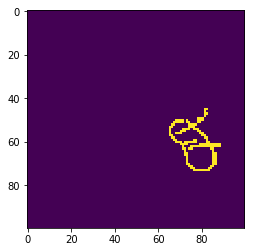

pear


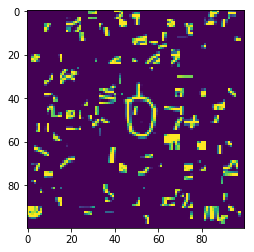

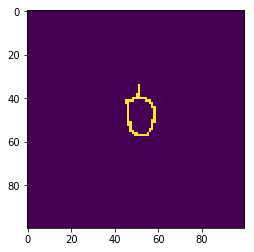

nail


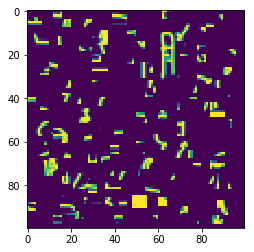

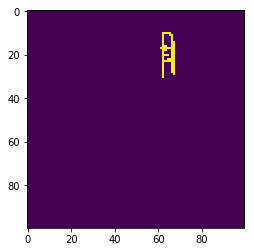

rabbit


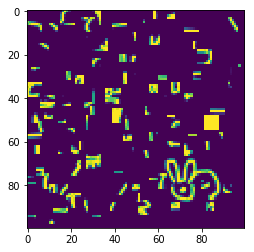

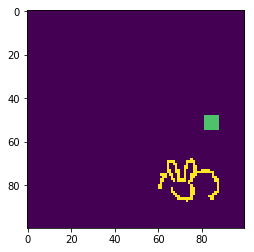

scorpion


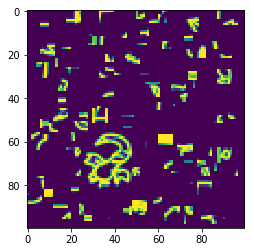

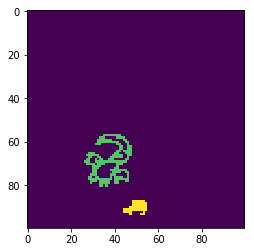

spoon


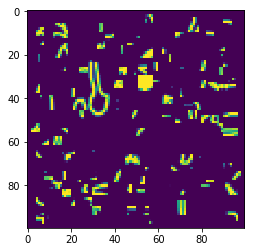

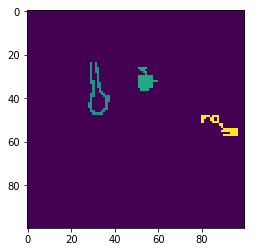

spoon


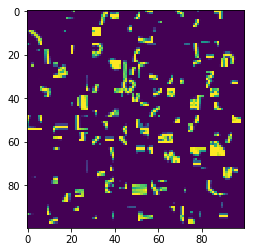

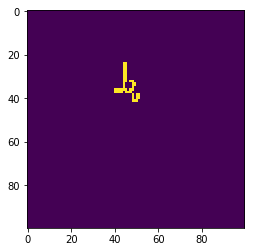

rifle


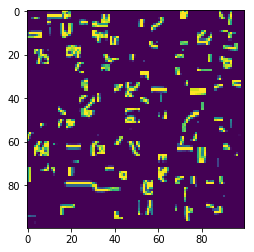

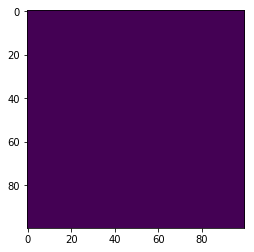

spoon


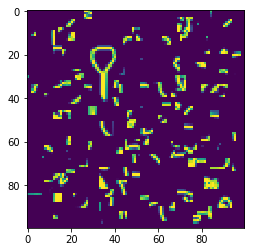

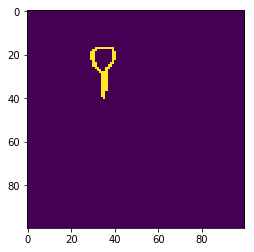

pineapple


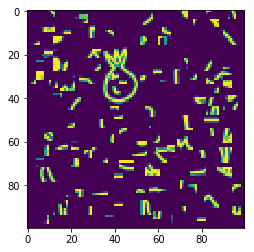

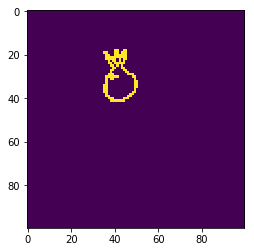

apple


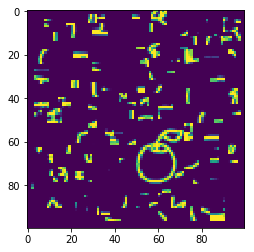

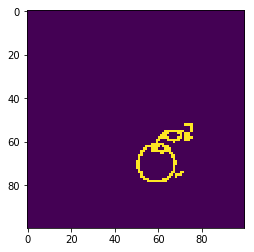

skull


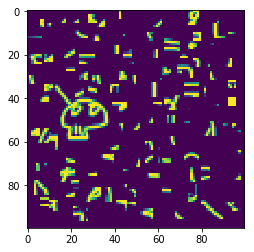

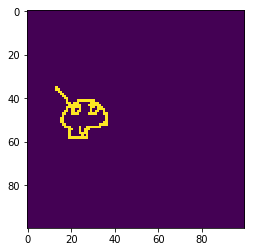

nose


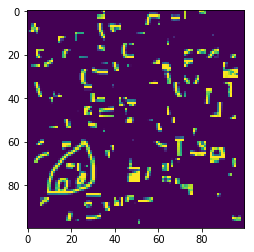

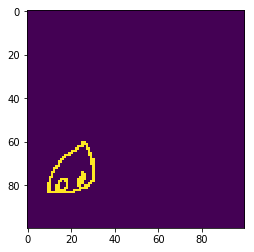

pineapple


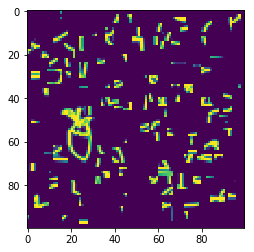

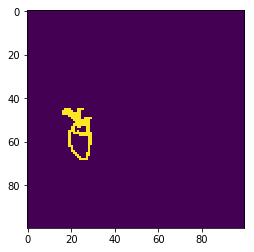

rifle


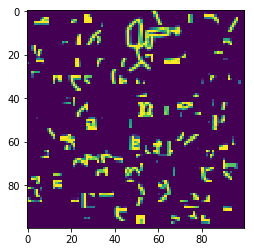

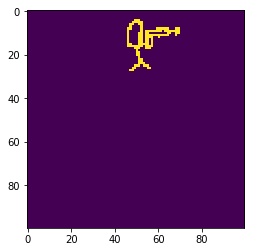

pineapple


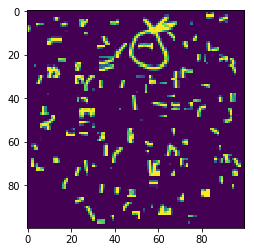

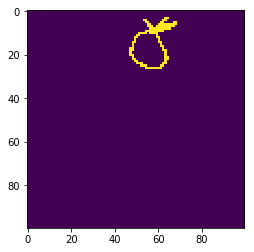

mouth


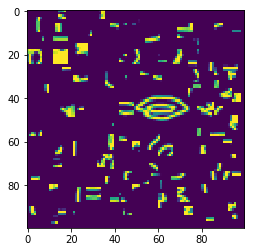

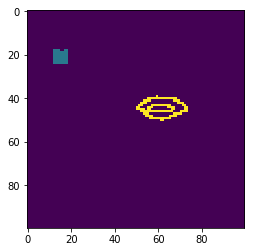

sailboat


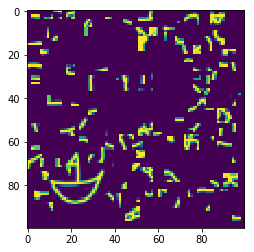

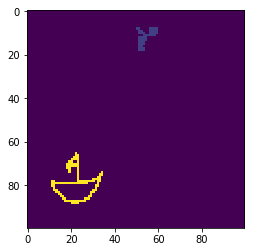

octagon


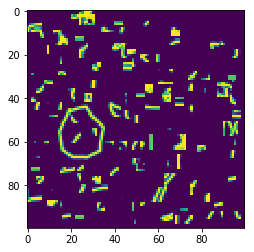

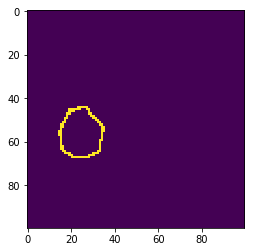

pineapple


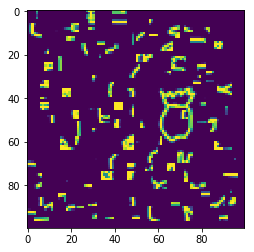

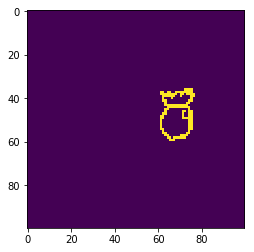

rollerskates


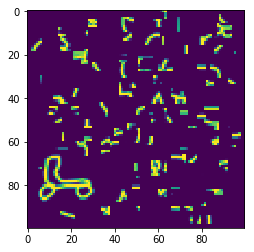

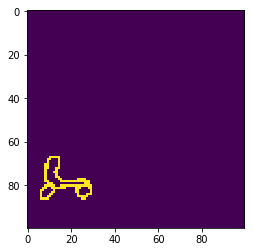

mouth


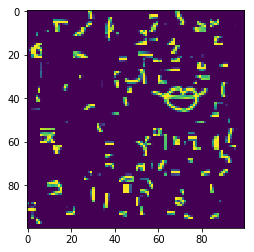

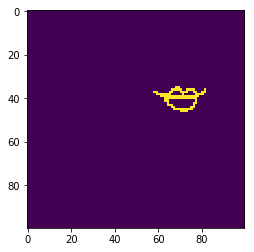

mouth


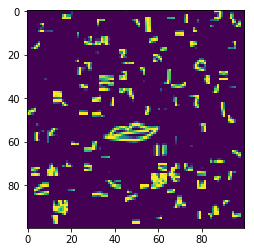

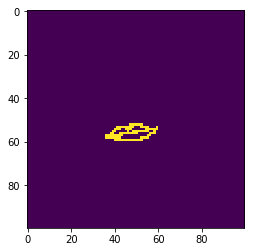

mouth


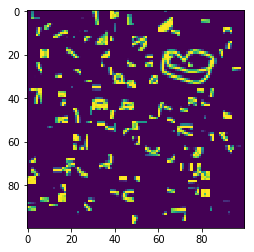

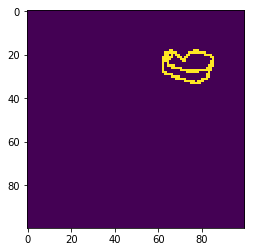

moustache


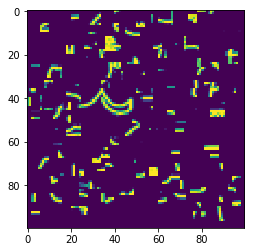

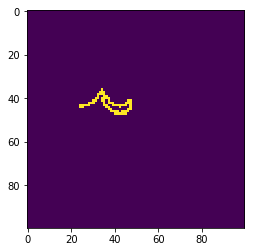

spoon


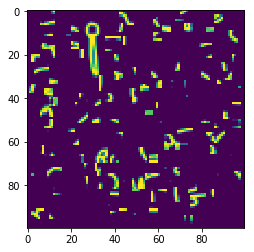

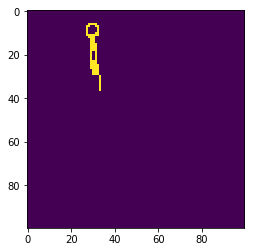

mouth


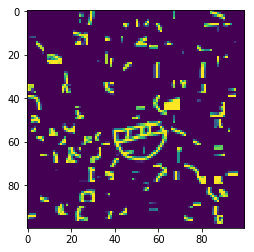

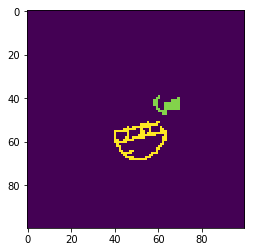

penguin


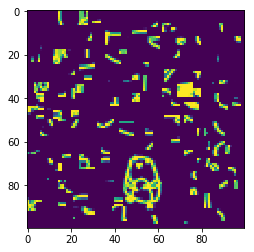

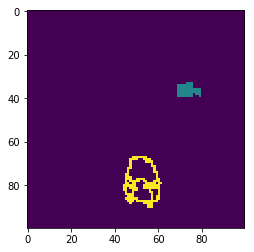

empty


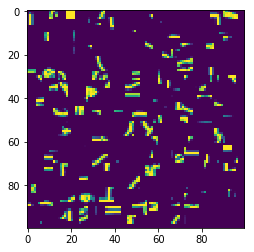

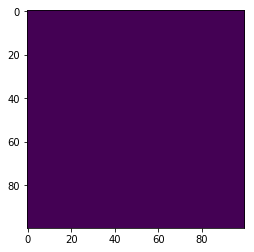

pool


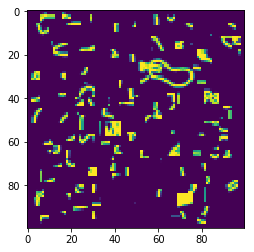

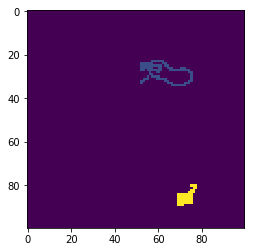

paintbrush


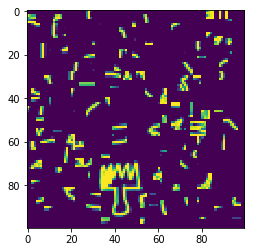

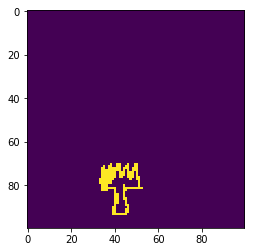

pineapple


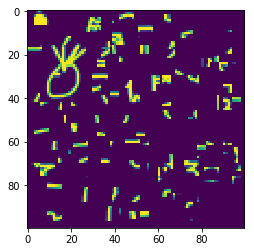

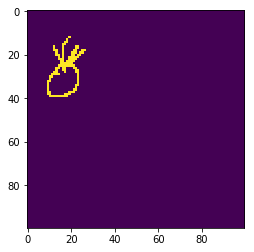

empty


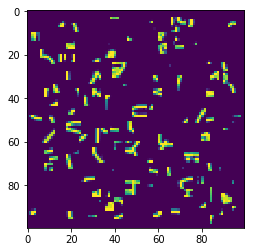

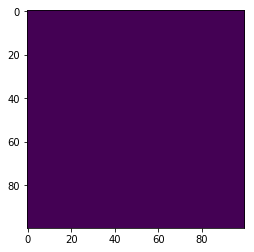

pool


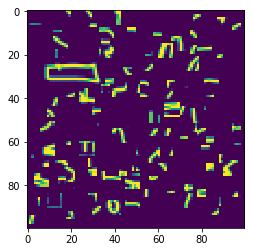

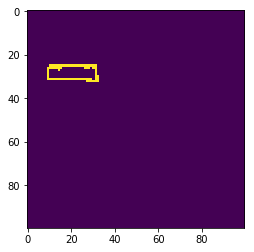

rabbit


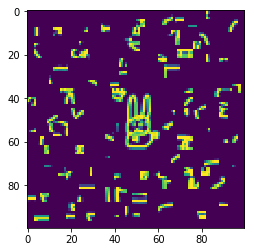

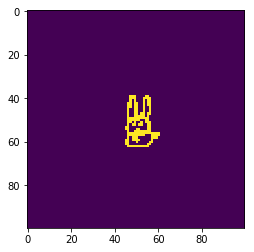

panda


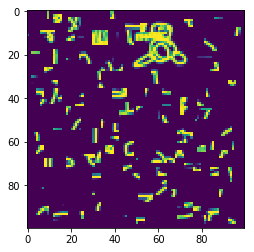

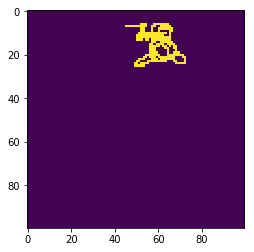

paintbrush


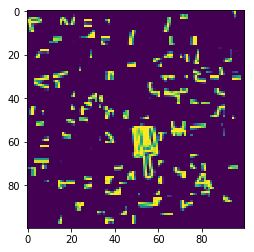

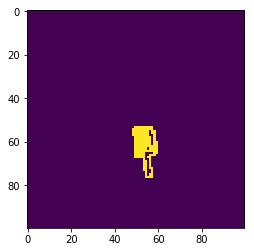

scorpion


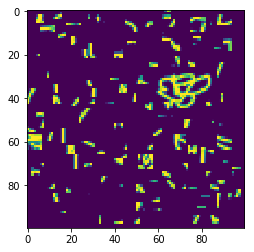

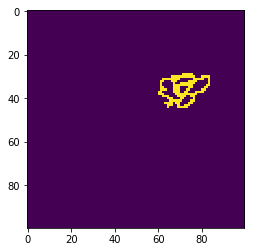

penguin


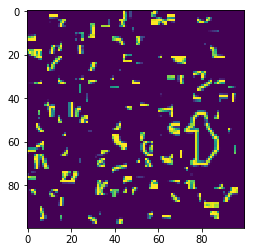

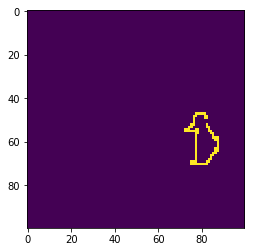

parrot


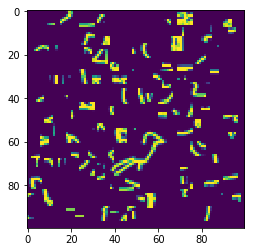

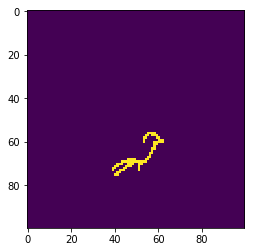

screwdriver


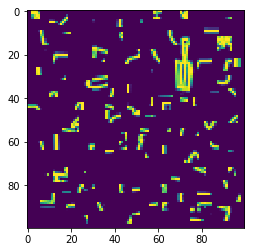

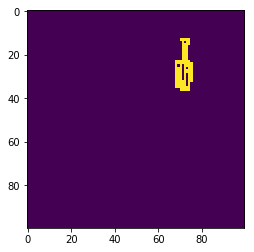

shovel


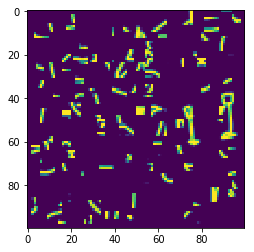

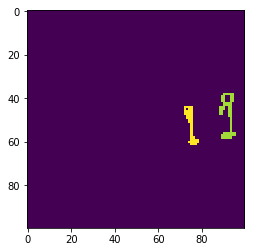

pear


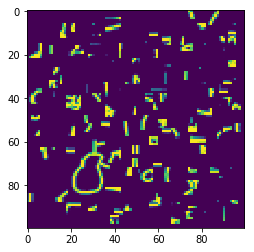

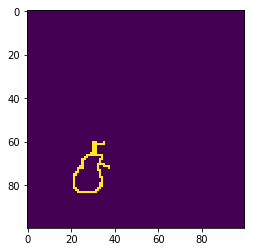

scorpion


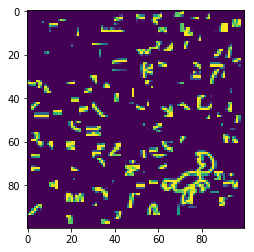

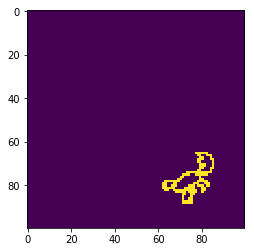

paintbrush


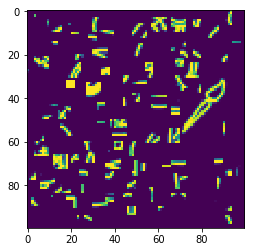

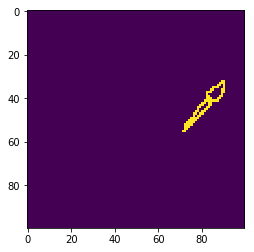

parrot


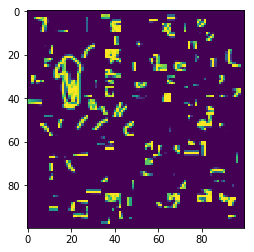

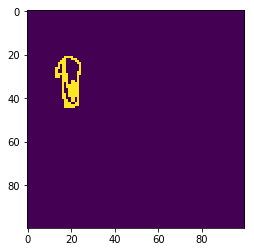

rifle


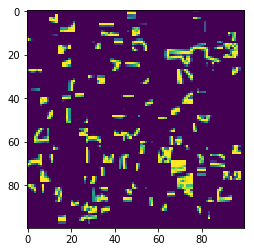

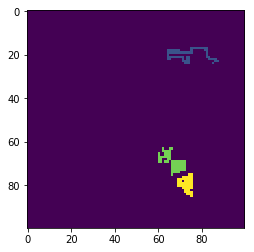

paintbrush


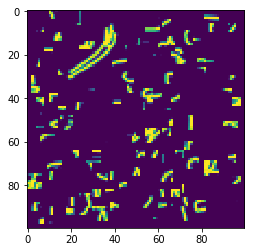

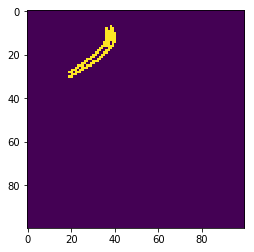

mouth


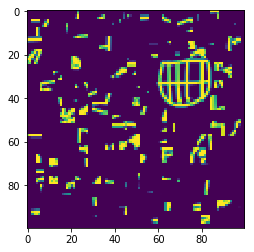

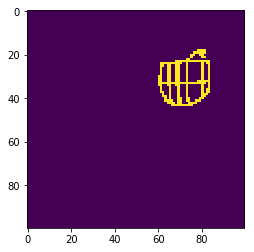

rollerskates


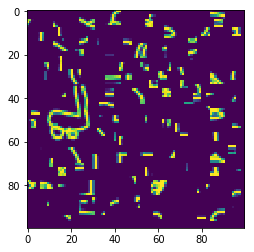

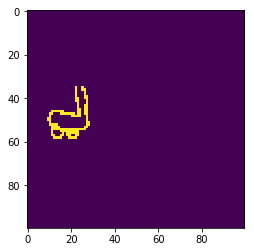

scorpion


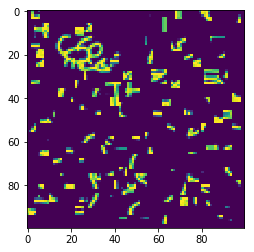

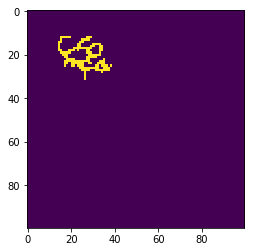

sink


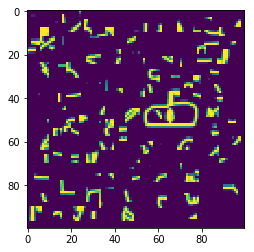

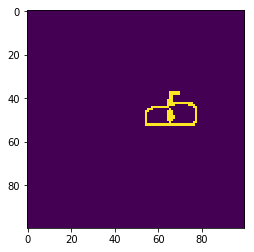

screwdriver


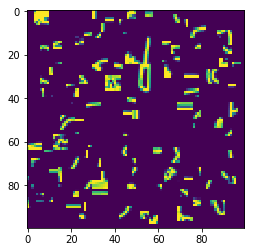

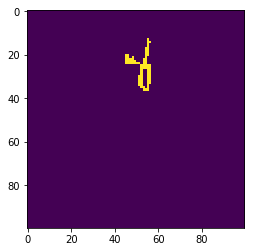

skateboard


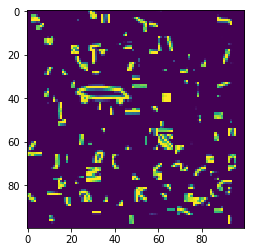

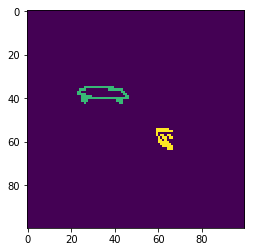

sink


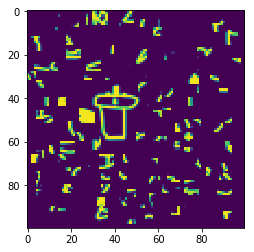

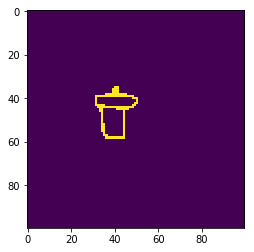

pineapple


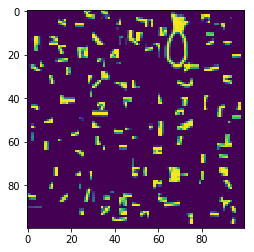

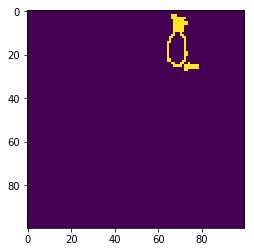

squiggle


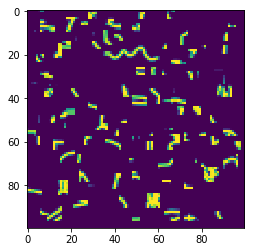

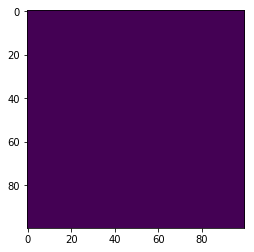

mouth


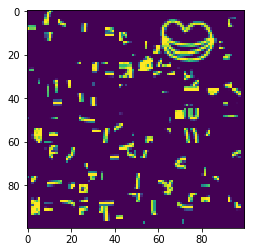

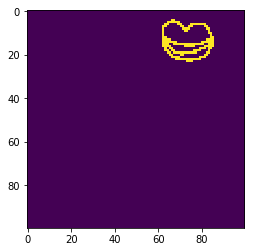

mouth


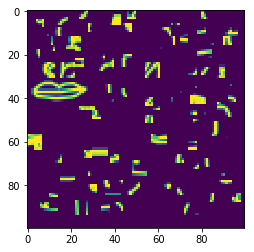

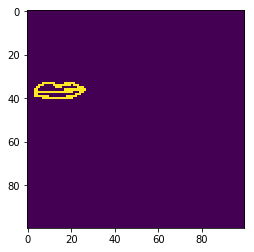

moustache


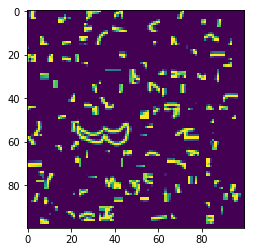

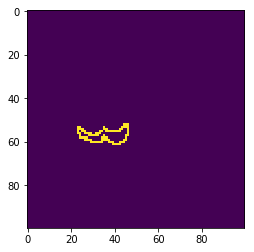

rollerskates


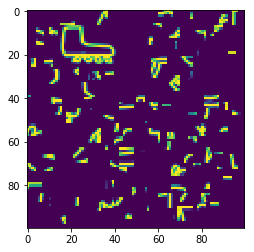

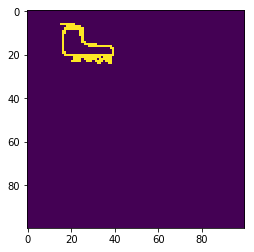

empty


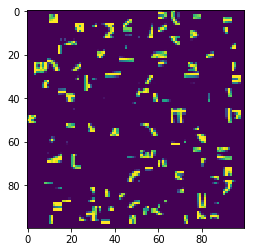

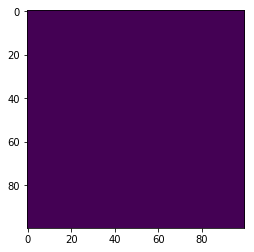

skull


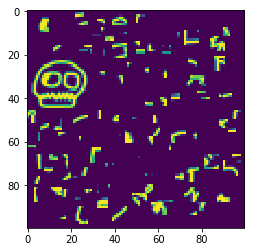

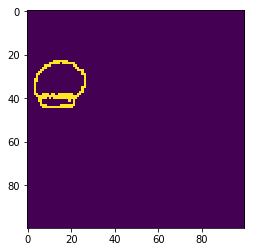

rollerskates


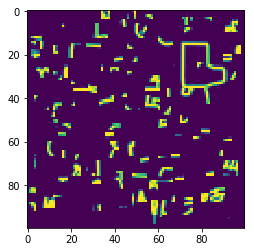

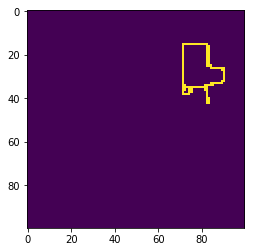

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(3)

# Transform class name to int
labels_to_int = {'sink': 0,
                 'moustache' : 1,
                 'nose' : 2,
                 'skateboard' : 3,
                 'penguin': 4,
                 'peanut': 5,
                 'skull': 6,
                 'panda': 7,
                 'paintbrush': 8,
                 'nail': 9,
                 'apple': 10,
                 'rifle': 11,
                 'mug': 12,
                 'sailboat': 13,
                 'pineapple':14,
                 'spoon': 15,
                 'rabbit': 16,
                 'shovel': 17,
                 'screwdriver': 18,
                 'scorpion': 19,
                 'rhinoceros': 20,
                 'rollerskates': 21,
                 'pool': 22,
                 'octagon': 23,
                 'pillow':24,
                 'parrot':25,
                 'squiggle':26,
                 'mouth':27,
                 'empty':28,
                 'pencil':29,
                 'pear': 30
                 }

train_size = 8000
train_labels = np.loadtxt('input/train_labels.csv', delimiter=',', skiprows=1, dtype='str')
y = np.array([labels_to_int[e[1]] for e in train_labels])
data_train = np.load('X_train.npy', encoding='latin1')
X_train = data_train[:train_size]
X_valid = data_train[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

#transform pixel with value below threshold to 0 and above to 1
binarizer = Binarizer(threshold=140)
binarizer2 = Binarizer(threshold=0)

for i in range(0,100):
    print(train_labels[i][1])

    from skimage import morphology
    from sklearn.preprocessing import Binarizer
    
    # show original
    plt.imshow(X_train[i].reshape(100,100))
    plt.show()

    X_train[i] = binarizer.transform(X_train[i].reshape(100,100)).astype(int).reshape(10000,)

    xilabel = morphology.label(X_train[i].reshape(100,100), connectivity=2)

    x_i_clean = morphology.remove_small_objects(xilabel, min_size=45, connectivity=2)
    
    #show apres binarisation + removing small object
    plt.imshow(x_i_clean.reshape(100,100))
    plt.show()
    
#     # binarize result
#     x_i_clean_bin = binarizer2.transform(x_i_clean.reshape(100,100))
#     plt.imshow(x_i_clean_bin.reshape(100,100))
#     plt.show()

##
# les variables importante qui modifient beaucoup les resultats sont min_size dans remove_small_objects() et threshold dans Binarize. 
# Une min_size trop grande et on enleve les petits dessins, trop petite on laisse du bruit 

# Si il y a plusieurs formes restentantes apres les transformations, les differentes forment sont de differentes couleur 
# (label dessine la premiere forme avec une seule valeure (int), la deuxieme forme est dessiné avec une valeur differente, et etc)
# de plus, entre X_train[i] et X_train[j], les valeurs utilisé sont pas les mêmes. Est-ce que ça affecterait le classifieur?
# possible d'utiliser un autre binarizer si affecte négativement
